# 토크나이저
- NLP 기계학습 모델은 원시데이터 그대로를 읽을수 없으며, 숫자형태로만 작업을 할수 있음
- 따라서 토크나이저는 텍스트를 -> 숫자로 변환하는 것
- 이 변환에는 여러가지 가능한 접근 방식이있음


[예시]


Byte-level BPE (GPT-2에 사용됨)

WordPiece (BERT에 사용됨)

SentencePiece, Unigram (몇몇 다국어 모델에 사용됨)

 존재하지 않는 단어는 [UNL]토큰으로 표시됨

-  공백 기반 토크나이저


In [1]:
tokenized_text = "나는 부산 사는 윤승현 입니다.".split()
print(tokenized_text)

['나는', '부산', '사는', '윤승현', '입니다.']


- 문자 기반 토크나이저
  - 두가지 이점이 있음
  - 어휘 길이가 훨씬 작다
  - 모든 단어가 문자로 구성될수 있음으로 [UNK]토큰이 훨씬 적게 들어감
  - 단, 의미론적으로 덜하다
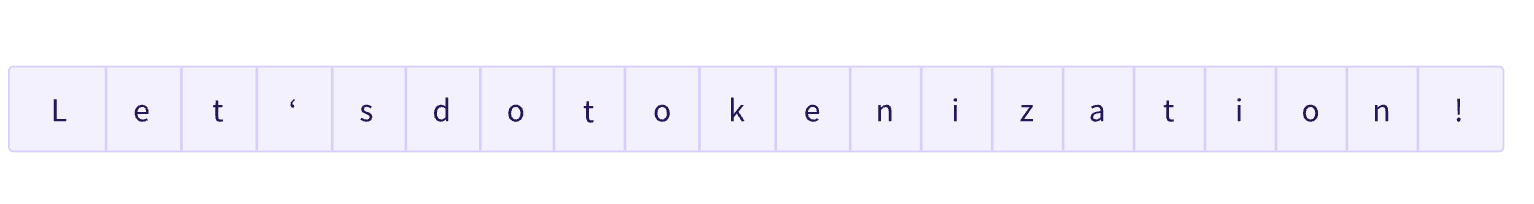

- 하위 단어 토큰화
  - 예시
  - 짜증나게 -> 짜증나게, 짜증

In [2]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer

In [4]:
# 토크나이저 저장
tokenizer.save_pretrained("saving_folder")

('saving_folder/tokenizer_config.json',
 'saving_folder/special_tokens_map.json',
 'saving_folder/vocab.txt',
 'saving_folder/added_tokens.json',
 'saving_folder/tokenizer.json')

# 토크나이저 사용방법
-

In [13]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"

tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [11]:
# 인코딩
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


In [12]:
# 디코딩
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


여러개를 입력받는 transformers 모델
- 앞에서 본 process대로 토큰화 -> 텐서 -> model에 넣는데 왜 에러가 난것일까?
  - transformers 모델은 기본적으로 여러 문장을 입력으로 받는다
  - 따라서, 차원을 늘려줘야한다.
  - [ids, ids]

In [21]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(ids)
print(input_ids)
# This line will fail.
model(input_ids)

tensor([ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
         2026,  2878,  2166,  1012])


IndexError: ignored

In [19]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = torch.tensor([ids])
print("Input IDs:", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


# input_ids
입력을 패딩처리 하기
- 직사각형형태가 아닌 리스트는 기존에 padding을 하지않으면 텐서로 변환 할수 없다.

In [23]:
padding_id = 100

batched_ids = [
    [200, 200, 200],
    [200, 200, padding_id],
]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


# 어텐션 마스크 (attention masks)
- 어텐션 마스크(attention mask)는 0과 1로 채워진 입력 식별자(input IDs) 텐서(tensor)와 형태가 정확하게 동일한 텐서(tensor)
- 1은 해당 토큰에 주의를 기울여야 함을 나타내고 0은 해당 토큰을 무시해야 함

In [27]:
batch_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batch_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


패딩 토큰을 이용하여 모델에 넣기

In [26]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


# 길이가 더 긴 시퀀스들
- 트랜스포머(Transformer) 모델을 사용할 때, 모델에 입력할 수 있는 시퀀스의 길이에 제한이 있음
- 대부분의 모델은 최대 512개 또는 1024개의 토큰 시퀀스를 처리하며, 그보다 더 긴 시퀀스를 처리하라는 요청을 받으면 오류를 발생시킴
-  이 문제에 대한 두 가지 솔루션이 있음

- 길이가 더 긴 시퀀스를 지원하는 모델을 사용

- 시퀀스를 절단합니다(truncation).

- 예시로 Longformer 모델은 아주 긴 시퀀스에 특화되어 이런 모델을 사용해보는것이있다.

In [29]:
# 시퀀스 자르기
max_sequence_length = 512

sequence = sequence[:max_sequence_length]